# Test of significance

This notebook will explain test of significance.

In [7]:
# Import libraries 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

# two-sided test for population mean

First, we try two-sided test for population mean. In this test, we want to know whether sample mean can be equal to population mean. In other words, our null hypothesis H is H:population mean = sample mean, otherwise, the alternative hypothesis H' is H':population mean != sample mean.

Terminology 
    test statistic ... the value used for a threshold
    
## i) If we know population standard deviation (Z-test),
### Distribution of population 

First plot a distribution of Population data (Let's say people's height). Here assume that the population data has a normal distribution with population mean=170 and population standard deviation=10.

*Generally, population mean and population standard deviation will not be computed in experimental data. To compute these value, you need to collect all data in the population.

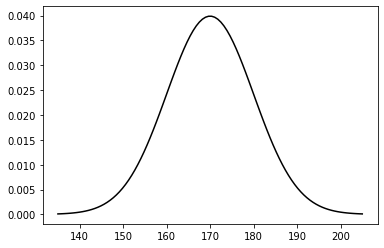

Population mean = 170
Population Standard Deviation = 10


In [8]:
# Set population properties
Pmean = 170# Mean of population data (this will not be computed in experimental data because you cannot have all individual data for this)
PSD = 10 # Population standard deviation (this will not be computed in experimental data as well)

# Plot histogram for population data 
x = np.linspace(Pmean - 3.5*PSD, Pmean + 3.5*PSD, 100) 
plt.plot(x, stats.norm.pdf(x, Pmean, PSD), color='k')

plt.show()
print('Population mean = ' + str(Pmean))
print('Population Standard Deviation = ' + str(PSD))

## Histogram of sample

In our experiment, we randomly pick up 25 people (sample size = 25) and measure their height. Based on the results, we plot histogram and get sample mean.

25
Observed data : 
[181.75041629 151.4309758  162.78433269 161.0774891  165.08880166
 174.56157778 173.42345155 166.00153409 195.89768621 168.60439073
 186.28414096 174.36199321 169.34036382 176.73383207 161.77413223
 177.47645831 159.92193711 175.03665921 161.24433687 179.90965586
 166.56159634 168.1396457  182.90876192 174.34903954 165.21709069]


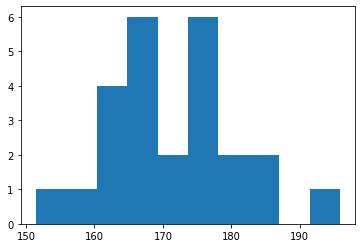

Sample mean = 171.19521199035148


In [10]:
# Sample size
Sn=25
# Data you get 
Sdata = np.random.normal(Pmean, PSD, Sn)

print(Sn)
print('Observed data : ')
print(Sdata)

# Plot histogram
fig, ax = plt.subplots()
ax.hist(Sdata)
plt.show() 

# Compute Sample mean
Smean = np.mean(Sdata)

print('Sample mean = ' + str(Smean))

### Z-test

We got sample mean = {{Smean}}. So, we will check whether {{Pmean}} = {{Smean}} by Z score.

In [13]:
# Compute Z score
Z = (Smean - Pmean) / (PSD * np.sqrt(Sn))

print('Z-score = ' + str(Z))

Z-score = 0.023904239807029624


If null hypothesis holds, Z-score have a distribution of N(0,1). So, we plot N(0,1) and whether Z-score will be in the distribution.

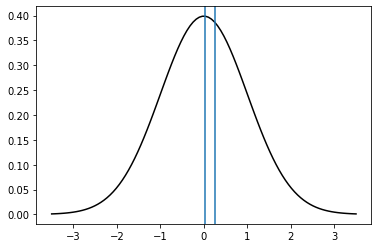

In [17]:
# Plot Distribution
x = np.linspace(0 - 3.5*1, 0 + 3.5*1, 100) 
plt.plot(x, stats.norm.pdf(x, 0, 1), color='k')

# Plot Z-score 
plt.axvline(Z)

plt.axvline(stats.norm.pdf(1-0.05/2, 0, 1))

## ii) If we do not know population standard deviation (t-test), 